<a href="https://colab.research.google.com/github/kid-116/ISTE-ML-SGP-21/blob/main/Week_1/Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h1>Data Loading</h1></b>


In [1]:
# uploading file
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Titanic_ISTE.csv to Titanic_ISTE.csv


In [2]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Titanic_ISTE.csv']))

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN


The output here is whether the passenger survived (1) or not (0).



<b><h1>Taking Care of Unimportant and Missing Data</h1></b>


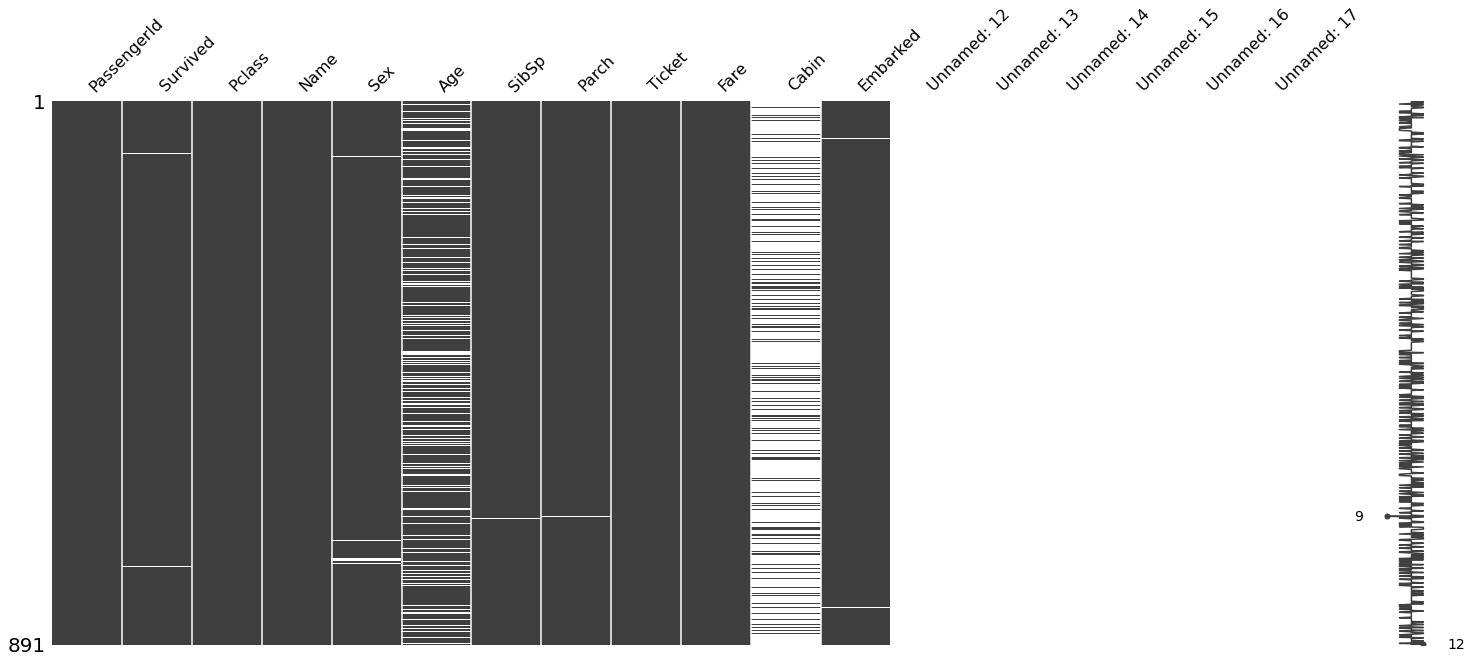

In [4]:
import missingno as msno
msno.matrix(data)

**Unimportant**
1.   Data in unnamed columns is non-existent and therefore the entirity of those columns may be droopped.
2.   As most of the data for the column 'Cabin' is missing, it would be ok to drop it as it can't be filled meaningfully and it will also somewhat be correlated to the fare which will be taken into account.
3. PassengerId, Name and Ticket No. does not affect the outcome in any way.
**Missing**
1.   For Age, Parch and SibSp, the missing values can be replaced by mean
2.   For Sex, Survived and Embarked the mode can replace the missing values




In [5]:
import numpy as np
parsed_data = data.drop(['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'], axis = 1) # U1
parsed_data = parsed_data.drop(['Cabin'], axis = 1) # U2
parsed_data['Age'] = parsed_data['Age'].replace(np.NaN, parsed_data['Age'].mean()) # M1
parsed_data['SibSp'] = parsed_data['SibSp'].replace(np.NaN, parsed_data['SibSp'].mean()) #M1
parsed_data['Parch'] = parsed_data['Parch'].replace(np.NaN, parsed_data['Parch'].mean()) #M1
parsed_data['Sex'].fillna(parsed_data['Sex'].mode()[0], inplace = True) # M2
parsed_data['Survived'].fillna(parsed_data['Survived'].mode()[0], inplace = True) # M2
parsed_data['Embarked'].fillna(parsed_data['Embarked'].mode()[0], inplace = True) # M2
parsed_data = parsed_data.drop(['Name', 'PassengerId', 'Ticket'], axis = 1) # U3
parsed_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S


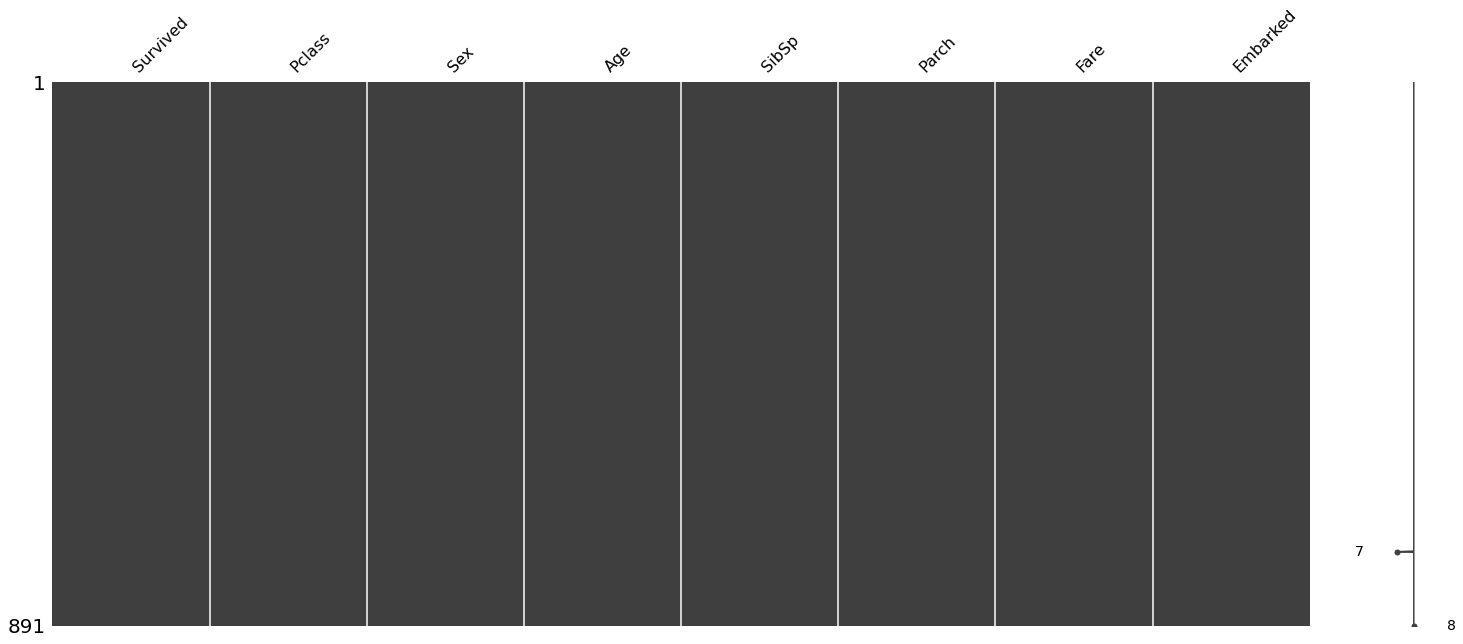

In [6]:
msno.matrix(parsed_data)

Hence we find a complete dataset.

<b><h1>Encoding</h1></b>

Sex and Embarked columns must be encoded. 
I think for Embarked, 'One Hot Encoding' is the right choice to not give any unitentional weight to any of the locations. **bold text**
'Nominal Encoding' would work best for Sex

In [7]:
pip install category_encoders

     |████████████████████████████████| 81kB 3.8MB/s 


**One Hot Encoding**

In [8]:
import category_encoders as ce
hot_encoder = ce.OneHotEncoder(cols = ['Embarked'], handle_unknown = 'return_nan', return_df = True, use_cat_names = True)
pdata_hotencoded = parsed_data
pdata_hotencoded = hot_encoder.fit_transform(pdata_hotencoded)
pdata_hotencoded.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,1.0,0.0,0.0
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,0.0,1.0,0.0
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,1.0,0.0,0.0
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,1.0,0.0,0.0
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,1.0,0.0,0.0


**Nominal Encoding**

In [9]:
pdata_nomencoded = parsed_data
sex_encoder = ce.OrdinalEncoder(
    cols = ['Sex'], 
    return_df = True,
    mapping = [
               {
                   'col' : 'Sex',
                   'mapping' : {
                       'male' : 0,
                       'female' : 1
                   }
               }
    ]
)
pdata_nomencoded = sex_encoder.fit_transform(pdata_nomencoded)
embarked_encoder = ce.OrdinalEncoder(
    cols = ['Embarked'], 
    return_df = True,
    mapping = [
               {
                   'col' : 'Embarked',
                   'mapping' : {
                       'C' : 0,
                       'S' : 1,
                       'Q' : 2
                   }
               }
    ]
)
pdata_nomencoded = embarked_encoder.fit_transform(pdata_nomencoded)
pdata_nomencoded.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,0,22.0,1.0,0.0,7.2500,1
1,1.0,1.0,1,38.0,1.0,0.0,71.2833,0
2,1.0,3.0,1,26.0,0.0,0.0,7.9250,1
3,1.0,1.0,1,35.0,1.0,0.0,53.1000,1
4,0.0,3.0,0,35.0,0.0,0.0,8.0500,1


<b><h1>Checking Dependencies</h1></b>

**Using Correlation Coefficient**

In [11]:
features = [
            parsed_data["Pclass"],
            parsed_data["Age"],
            parsed_data["SibSp"],
            parsed_data["Parch"],
            parsed_data["Fare"],
            pdata_nomencoded["Sex"],
            pdata_nomencoded["Embarked"]
]
output = parsed_data["Survived"]
for feature in features:
  correlation = output.corr(feature)
  print(feature.value_counts(), '\n', 'Corr:', correlation, '\n')

3.0    490
1.0    216
2.0    184
Name: Pclass, dtype: int64 
 Corr: -0.34220153795929686 

29.675801    179
24.000000     30
22.000000     27
18.000000     26
30.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64 
 Corr: -0.07059421210791712 

0.000000    608
1.000000    209
2.000000     28
4.000000     18
3.000000     16
8.000000      7
5.000000      4
0.517978      1
Name: SibSp, dtype: int64 
 Corr: -0.03620994086402562 

0.000000    677
1.000000    117
2.000000     80
3.000000      5
5.000000      5
4.000000      4
0.381327      2
6.000000      1
Name: Parch, dtype: int64 
 Corr: 0.08243226962804308 

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64 
 Corr: 0.2595160089126138 

0    579
1    312
Name: Sex, dtype: int64 
 Corr: 0.5373346375018

Sex can be seen to be most dominant factor





**Using Chi-Square Method**

In [12]:
from scipy.stats import chi2_contingency
for feature in features:
  CrosstabRes = pd.crosstab(index = feature, columns = output)
  print(CrosstabRes)
  ChiSqRes = chi2_contingency(CrosstabRes)
  print('P-Value: ', ChiSqRes[1], '\n')

Survived  0.0  1.0
Pclass            
1.0        80  136
2.0        97   87
3.0       373  117
P-Value:  1.4982105184392914e-23 

Survived  0.0  1.0
Age               
0.42        0    1
0.67        0    1
0.75        0    2
0.83        0    2
0.92        0    1
...       ...  ...
70.00       2    0
70.50       1    0
71.00       2    0
74.00       1    0
80.00       0    1

[89 rows x 2 columns]
P-Value:  0.029710718423897133 

Survived  0.0  1.0
SibSp             
0.000000  399  209
0.517978    1    0
1.000000   97  112
2.000000   15   13
3.000000   13    3
4.000000   15    3
5.000000    4    0
8.000000    7    0
P-Value:  1.897040903944127e-06 

Survived  0.0  1.0
Parch             
0.000000  446  231
0.381327    1    1
1.000000   53   64
2.000000   40   40
3.000000    2    3
4.000000    4    0
5.000000    4    1
6.000000    1    0
P-Value:  0.0002281925489821441 

Survived  0.0  1.0
Fare              
0.0000     14    1
4.0125      1    0
5.0000      1    0
6.2375      1    0
6.437

Here the biggest influencer seems to be age.

<b><h1>Feature Scaling</h1></b>

In [13]:
parsed_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S


In [15]:
parsed_data.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         8
Parch         8
Fare        248
Embarked      3
dtype: int64

Scaling is necessary for Age and Fare



**Normalization**

In [24]:
X = parsed_data.iloc[:, [3, 6]].values
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
print('Original:\n', X)
norm_X = norm.fit_transform(X)
print('\nNormalised:\n', norm_X)

Original:
 [[22.          7.25      ]
 [38.         71.2833    ]
 [26.          7.925     ]
 ...
 [29.67580056 23.45      ]
 [26.         30.        ]
 [32.          7.75      ]]

Normalised:
 [[0.27117366 0.01415106]
 [0.4722292  0.13913574]
 [0.32143755 0.01546857]
 ...
 [0.36762755 0.04577135]
 [0.32143755 0.0585561 ]
 [0.39683338 0.01512699]]


**Standardisation**

In [25]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
print('Original:\n', X)
std_X = std.fit_transform(X)
print('\nNormalised:\n', std_X)

Original:
 [[22.          7.25      ]
 [38.         71.2833    ]
 [26.          7.925     ]
 ...
 [29.67580056 23.45      ]
 [26.         30.        ]
 [32.          7.75      ]]

Normalised:
 [[-5.91351242e-01 -5.02445171e-01]
 [ 6.41304531e-01  7.86845294e-01]
 [-2.83187299e-01 -4.88854258e-01]
 ...
 [-2.73704564e-16 -1.76263239e-01]
 [-2.83187299e-01 -4.43810379e-02]
 [ 1.79058616e-01 -4.92377828e-01]]
